In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [3]:
objp.shape

(42, 3)

In [7]:
ret

False

False

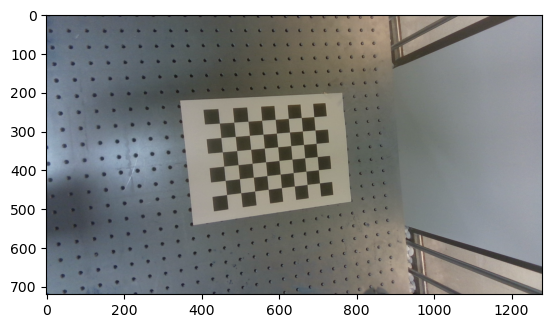

In [33]:
img_path = r'C:\Users\HP\Desktop\hzq\hanglok-robotics\calibration\saved_07_14_16_18\8.png'

img = cv2.imread(img_path)


lwr = np.array([0,0,143])
upr = np.array([179,61,252])
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
msk = cv2.inRange(hsv,lwr,upr)
krn = cv2.getStructuringElement(cv2.MORPH_RECT,(50,30))
dlt = cv2.dilate(msk,krn,iterations=5)
res = 255 - cv2.bitwise_and(dlt,msk)
res = np.uint8(res)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (10,8),None)
# plt.imshow(res)
# plt.show()
if ret == True:
    objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
    corners2 = cv2.cornerSubPix(res,corners,(11,11),(-1,-1),criteria)
    imgpoints.append(corners2)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (7,6), corners2, ret)

# cv2.imshow('img', img)
plt.imshow(img)
ret

In [ ]:
cap = cv2.VideoCapture(0)
found = 0
while(found < 10):  # Here, 10 can be changed to whatever number you like to choose
    ret, img = cap.read() # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        found += 1

    cv2.imshow('img', img)
    cv2.waitKey(10)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
